# Unit 5 - Financial Planning

In [27]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from alpaca_trade_api.rest import REST, TimeFrame
from datetime import datetime, timedelta

%matplotlib inline

In [28]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [29]:
# Set current amount of crypto assets
my_btc = 2.5
my_eth = 7.5

In [30]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [31]:
# Fetch current BTC price
btc_response = requests.get(btc_url)
btc_data = btc_response.json()
btc_price = btc_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_response = requests.get(eth_url)
eth_data = eth_response.json()
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 2.5 BTC is $161805.00
The current value of your 7.5 ETH is $25159.43


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [32]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [33]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca = REST(alpaca_api_key, alpaca_secret_key, base_url='https://paper-api.alpaca.markets')

In [35]:
# Format current date as ISO format
today = datetime.now()
today_date = today.strftime('%Y-%m-%d')

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
start_date = (datetime.now() - timedelta(days=30)).strftime('%Y-%m-%d')
end_date = (datetime.now() - timedelta(days=20)).strftime('%Y-%m-%d')
portfolio_df = alpaca.get_bars(tickers, timeframe, start=start_date, end=end_date).df


# Reorganize the DataFrame
# Separate ticker data
agg_df = portfolio_df[portfolio_df['symbol'] == 'AGG'].drop('symbol', axis=1)
spy_df = portfolio_df[portfolio_df['symbol'] == 'SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
combined_df = pd.concat([agg_df, spy_df], axis=1, keys=['AGG', 'SPY'])

# Preview DataFrame
print(combined_df.head())

                             AGG                                       \
                           close     high      low trade_count   open   
timestamp                                                               
2024-02-20 05:00:00+00:00  97.19  97.3575  97.1600       25989  97.23   
2024-02-21 05:00:00+00:00  96.90  97.2800  96.8653       25650  97.28   
2024-02-22 05:00:00+00:00  96.98  97.0900  96.8400       28992  96.93   
2024-02-23 05:00:00+00:00  97.34  97.3900  96.9900       24293  96.99   
2024-02-26 05:00:00+00:00  97.13  97.3500  96.9700       27879  97.34   

                                                  SPY                  \
                            volume       vwap   close    high     low   
timestamp                                                               
2024-02-20 05:00:00+00:00  8735680  97.247060  496.76  498.41  494.45   
2024-02-21 05:00:00+00:00  7785144  96.986279  497.21  497.37  493.56   
2024-02-22 05:00:00+00:00  7538284  96.947558  507

In [36]:
# Pick AGG and SPY close prices
agg_close_price = combined_df['AGG']['close'][-1]
spy_close_price = combined_df['SPY']['close'][-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $97.19
Current SPY closing price: $506.26


In [38]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $25313.00
The current value of your 200 AGG shares is $19438.00


### Savings Health Analysis

In [39]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
savings_data = {
    'amount': {
        'crypto': my_btc_value + my_eth_value,
        'shares': my_spy_value + my_agg_value
    }
}

# Create savings DataFrame
df_savings = pd.DataFrame(savings_data)

# Display savings DataFrame
display(df_savings)

,amount
crypto,186964.425
shares,44751.000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

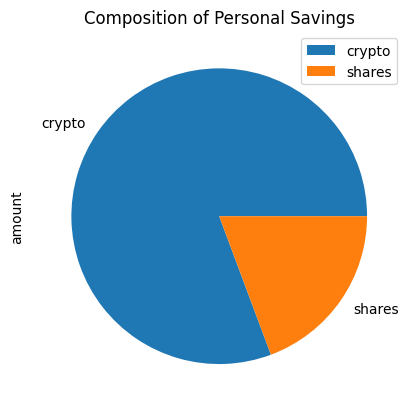

In [41]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', title='Composition of Personal Savings')

In [42]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['amount'].sum()

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations on reaching this financial goal of an ideal emergency fund.")
else:
    shortfall = emergency_fund - total_savings
    print(f"You are ${shortfall:0.2f} away from reaching the goal of an ideal emergency fund.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [43]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [46]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df


# Reorganize the DataFrame
# Separate ticker data
df_stock_data = df_stock_data.pivot(columns='symbol', values='close')

# Display sample data
df_stock_data.head()

symbol,AGG,SPY
timestamp,,
2016-05-02 04:00:00+00:00,110.605,207.9700
2016-05-03 04:00:00+00:00,110.810,206.1592
2016-05-04 04:00:00+00:00,110.860,205.0100
2016-05-05 04:00:00+00:00,111.140,204.9700
2016-05-06 04:00:00+00:00,110.970,205.7200


In [54]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Create a MultiIndex for the columns to give them a top level (ticker names) and a sub level (data types, e.g., 'close')
column_names = [('AGG', 'close'), ('SPY', 'close')]
df_stock_data.columns = pd.MultiIndex.from_tuples(column_names)

num_simulations = 500
num_trading_days = 252
num_years = 30
MC_simulation = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.40, 0.60],
    num_simulation = num_simulations,
    num_trading_days = num_trading_days * num_years
)

In [55]:
# Printing the simulation input data
MC_simulation.portfolio_data.head()

AGG                    SPY             
                             close daily_return     close daily_return
timestamp                                                             
2016-05-02 04:00:00+00:00  110.605          NaN  207.9700          NaN
2016-05-03 04:00:00+00:00  110.810     0.001853  206.1592    -0.008707
2016-05-04 04:00:00+00:00  110.860     0.000451  205.0100    -0.005574
2016-05-05 04:00:00+00:00  111.140     0.002526  204.9700    -0.000195
2016-05-06 04:00:00+00:00  110.970    -0.001530  205.7200     0.003659

In [56]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\Alex\Desktop\FinTech-CourseWork\Assignments\Assignment_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000468,1.012638,0.988492,0.990473,1.005510,0.993307,0.996135,1.001611,1.011683,1.005572,...,0.998858,0.998198,1.004356,1.005177,1.001392,1.009409,1.001516,1.007825,0.993630,1.004401
2,0.992893,1.021930,0.997880,0.995823,0.999803,0.984241,0.996998,0.990456,1.004989,0.995789,...,1.019751,0.990485,1.010403,1.003856,0.989153,1.022093,0.998197,0.999867,0.992456,1.003291
3,0.986216,1.022866,0.998588,0.995836,1.004007,0.979852,0.997628,0.990917,1.010242,0.996795,...,1.025839,0.993129,1.006575,1.003025,0.989319,1.018177,0.997866,1.017970,1.004363,1.011146
4,0.976806,1.021936,1.002091,0.989241,1.002411,0.978748,1.001083,0.989627,1.011870,0.992512,...,1.038683,0.996040,1.004967,1.000244,0.991770,1.017262,0.997195,1.015332,1.001587,0.998994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,16.884808,13.533852,13.644931,7.131516,4.295066,8.654673,20.422163,30.582829,26.344605,13.708510,...,30.649338,13.190652,36.180174,5.578722,16.898486,6.186681,37.712276,14.557430,27.406496,21.958593
7557,16.751703,13.371991,13.558264,7.119296,4.313339,8.689513,20.337655,30.464532,26.658713,13.575757,...,30.821964,13.113396,36.040616,5.575565,17.257965,6.159610,37.727130,14.682854,27.114858,22.005340
7558,16.735990,13.324654,13.484738,7.117619,4.300469,8.635635,20.188371,30.661314,26.510360,13.489275,...,30.922554,13.083920,35.895699,5.555681,17.259024,6.201619,37.730265,14.559748,27.096614,21.927997
7559,16.689399,13.464252,13.416926,7.194184,4.274573,8.686876,20.204176,30.581098,26.542774,13.495408,...,31.143412,13.115956,36.015044,5.549357,17.178529,6.217067,37.773803,14.498854,27.057508,21.687060


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

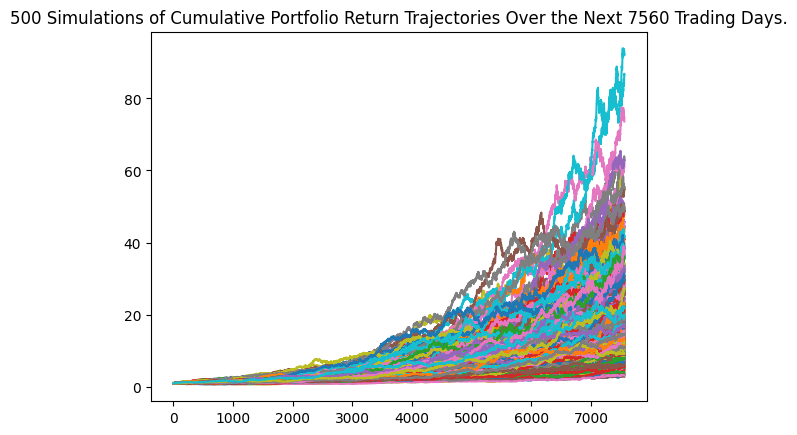

In [57]:
# Plot simulation outcomes
MC_simulation.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

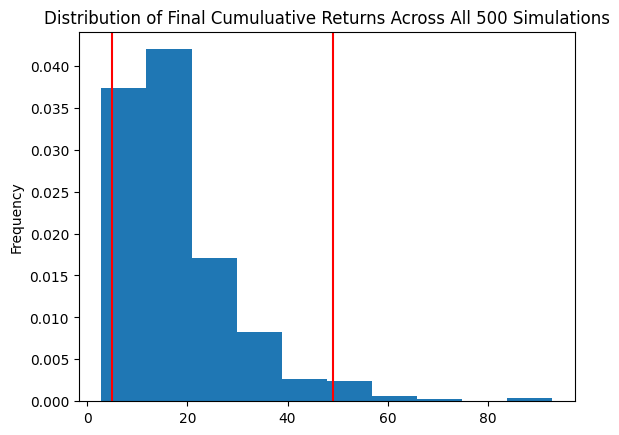

In [58]:
# Plot probability distribution and confidence intervals
MC_simulation.plot_distribution()

### Retirement Analysis

In [59]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_statistics = MC_simulation.summarize_cumulative_return()

# Print summary statistics
print(summary_statistics)

count           500.000000
mean             18.120133
std              11.903015
min               2.804149
25%               9.753872
50%              15.195417
75%              22.395026
max              92.868176
95% CI Lower      4.942225
95% CI Upper     48.996852
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [66]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = 4.942225
ci_upper = 48.996852

ci_lower_dollar_amount = initial_investment * ci_lower
ci_upper_dollar_amount = initial_investment * ci_upper

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_dollar_amount} and ${ci_upper_dollar_amount}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $98844.5 and $979937.0399999999


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [67]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = 4.942225
ci_upper = 48.996852

ci_lower_dollar_amount = initial_investment * ci_lower
ci_upper_dollar_amount = initial_investment * ci_upper

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_dollar_amount} and ${ci_upper_dollar_amount}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $148266.75 and $1469905.5599999998


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001799,1.000245,1.006243,0.995742,1.003219,0.998395,0.997985,1.004253,1.002497,0.998947,...,1.007121,1.004291,1.000334,1.000876,0.998973,1.001375,0.996477,1.002103,1.005063,0.995521
2,0.998289,1.000243,1.004284,0.996554,1.004502,0.993317,0.996037,1.010316,1.000850,0.996382,...,1.007016,1.003709,0.999542,1.001450,1.004142,1.004022,0.996702,1.004359,1.009205,0.999000
3,1.002639,0.997279,1.008339,0.992870,0.998657,0.989041,0.994189,1.010062,0.999200,0.999132,...,1.004156,1.002288,1.003976,0.994908,1.008989,1.004545,0.995074,1.010488,1.011124,1.002626
4,1.008853,0.996292,1.002813,0.995244,0.996794,0.990576,0.999322,1.010897,0.989222,0.995257,...,1.000057,1.007349,1.006909,0.990823,1.013085,1.002427,0.996293,1.007081,1.010369,0.998654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.438618,0.926659,1.048662,1.101424,1.134443,1.200987,1.347489,1.257520,1.428939,1.194429,...,1.104654,1.273680,1.276718,1.297344,1.229379,1.295593,1.501864,1.198438,1.386161,1.426163
1257,1.441785,0.926428,1.048574,1.104941,1.137374,1.204559,1.360843,1.260661,1.429710,1.201055,...,1.107447,1.269262,1.265880,1.296800,1.227049,1.297884,1.510874,1.190802,1.388448,1.427391
1258,1.444675,0.931714,1.053040,1.110206,1.140592,1.199869,1.358605,1.254728,1.426409,1.207420,...,1.101690,1.274683,1.281527,1.303255,1.227517,1.294870,1.503567,1.191945,1.388434,1.441467
1259,1.443488,0.934065,1.049921,1.108998,1.142538,1.203844,1.363563,1.254192,1.425030,1.213366,...,1.103902,1.276629,1.275813,1.296929,1.222773,1.285521,1.498580,1.192940,1.397786,1.440244


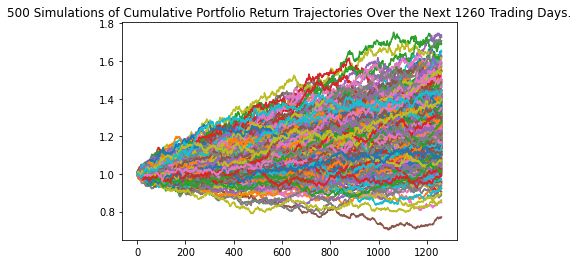

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!

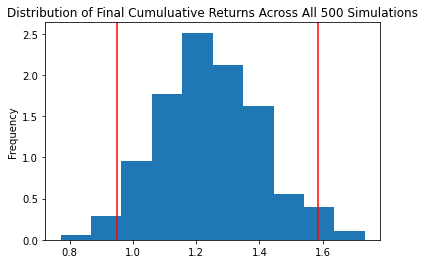

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.245905
std               0.160008
min               0.771559
25%               1.140795
50%               1.232555
75%               1.352284
max               1.733421
95% CI Lower      0.951523
95% CI Upper      1.586592
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57091.37 and $95195.55


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004461,1.003269,0.998934,0.996767,1.000906,0.999279,0.995262,1.005752,0.993466,0.993655,...,1.001427,1.004350,0.996932,0.996844,0.997507,1.003457,0.998736,1.001195,0.999904,1.010218
2,1.007901,1.003304,0.993812,0.999973,1.000910,1.002347,0.996311,1.007234,0.993550,0.991021,...,0.997379,1.001952,0.998124,0.998063,1.001733,1.000273,0.994865,1.000109,0.994648,1.007838
3,1.007532,1.001077,0.990963,0.998339,1.001779,1.003653,0.994439,1.012230,0.999170,0.996484,...,0.995265,1.001745,0.995332,1.003023,1.003800,0.999755,0.997616,1.004730,0.993391,1.010444
4,1.020339,1.005743,0.991869,0.998218,1.005630,1.008717,0.987764,1.012750,0.999227,0.996474,...,0.999028,1.004730,0.995357,1.000204,1.008738,0.999273,0.999426,1.003776,0.991478,1.013379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.616922,1.761703,1.143430,1.687801,1.743826,1.174891,1.514199,2.447129,1.589765,1.570578,...,1.316494,1.863650,1.727959,1.411033,1.804671,1.500605,1.413278,1.552375,1.318340,1.960015
2517,1.620285,1.769184,1.145132,1.695693,1.742878,1.175745,1.517697,2.441471,1.586174,1.560826,...,1.318463,1.857860,1.724003,1.409092,1.810136,1.499466,1.413210,1.552539,1.316872,1.956776
2518,1.622141,1.771927,1.149019,1.691589,1.739420,1.178965,1.522624,2.444413,1.580680,1.566154,...,1.317147,1.864694,1.727503,1.419561,1.821212,1.492831,1.412283,1.556659,1.318842,1.961271
2519,1.628885,1.770207,1.149670,1.703935,1.738053,1.182429,1.519485,2.441360,1.565663,1.576607,...,1.307985,1.858986,1.728039,1.430017,1.814690,1.496851,1.409284,1.562660,1.324798,1.964190


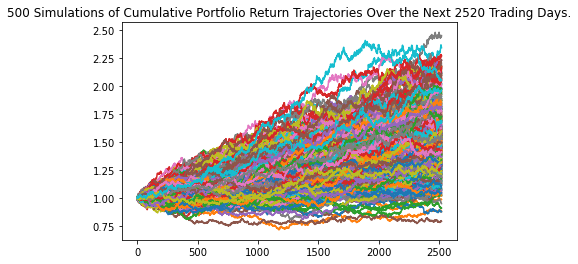

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!

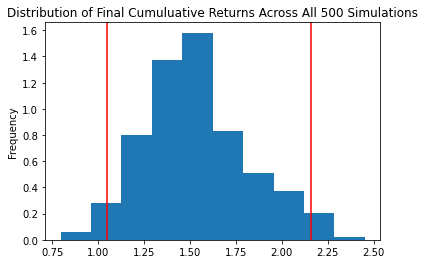

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12
